In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

CO_MUN = 3304557 # Rio de Janeiro

In [2]:
df_enem_rio = pd.concat(df_enem.loc[df_enem.CO_MUNICIPIO_ESC== CO_MUN] for df_enem in 
                        pd.read_csv('dados\microdados_enem2018\DADOS\MICRODADOS_ENEM_2018.csv', 
                                chunksize=10000, 
                                sep=';', encoding='iso8859-1'))
df_enem_rio.dropna(subset=['CO_ESCOLA'], inplace=True)
df_enem_rio['CO_ESCOLA'] = df_enem_rio.CO_ESCOLA.astype(int)
df_enem_rio.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
412,180008309665,2018,3304557,Rio de Janeiro,33,RJ,18.0,F,0.0,2,...,A,B,B,B,B,A,A,B,B,A
445,180008257113,2018,3304557,Rio de Janeiro,33,RJ,17.0,F,0.0,3,...,A,C,A,B,D,B,B,B,B,D
522,180007766909,2018,3304557,Rio de Janeiro,33,RJ,22.0,F,0.0,3,...,B,C,A,A,E,B,C,B,B,A
524,180008260442,2018,3304557,Rio de Janeiro,33,RJ,19.0,F,0.0,1,...,A,C,A,A,E,A,B,B,B,A
1003,180008199563,2018,3304557,Rio de Janeiro,33,RJ,18.0,F,0.0,1,...,A,B,A,A,E,A,B,B,B,A


In [3]:
df_enem_rio.shape

(39225, 137)

In [4]:
df_g = df_enem_rio.loc[:, [ 'CO_ESCOLA','NU_NOTA_REDACAO']].groupby('CO_ESCOLA')\
       .agg(mediana=('NU_NOTA_REDACAO','median'), num=('NU_NOTA_REDACAO','size'))\
       .sort_values('mediana', ascending=False)
df_g.head()

,mediana,num
CO_ESCOLA,,
33064628,940.0,9
33087679,940.0,13
33157316,920.0,5
33135371,920.0,92
33064040,910.0,16


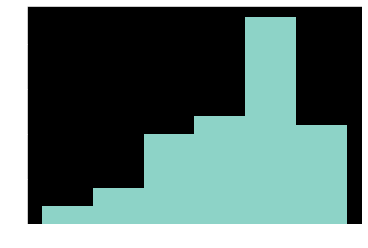

In [5]:
CO_SAO_BENTO = 33062633
#df_enem_rio[df_enem_rio.CO_ESCOLA == CO_SAO_BENTO]
plt.hist(df_enem_rio.loc[df_enem_rio.CO_ESCOLA ==CO_SAO_BENTO, 'NU_NOTA_REDACAO'], bins='fd');

In [6]:
with pd.option_context('display.max_rows', None):
    print(df_enem_rio.loc[df_enem_rio.CO_ESCOLA ==CO_SAO_BENTO, 'NU_NOTA_REDACAO'])
    
    print(df_enem_rio.loc[df_enem_rio.CO_ESCOLA ==CO_SAO_BENTO, 'NU_NOTA_REDACAO'].size)

283991     920.0
397048     960.0
405940     940.0
655354     920.0
672142     800.0
678709     920.0
679101     860.0
698637     880.0
719996     940.0
761041     920.0
767805     920.0
803074     840.0
893160     880.0
912119     820.0
941272     840.0
999126     920.0
1015814    780.0
1016002    960.0
1019587    880.0
1065075    900.0
1575556    900.0
1603528    760.0
1623123    920.0
1632446    940.0
1669150    940.0
1698827    840.0
1715349    940.0
1815674    740.0
1856052    880.0
2117559    900.0
2216676    920.0
2234444    800.0
2235174    820.0
2237326    820.0
2239940    880.0
2260091    880.0
2269825    820.0
2529820    920.0
2536721    880.0
2562036    880.0
2601342    920.0
2784014    920.0
2795822    940.0
2798493    960.0
2956151    880.0
2995832    880.0
3176529    920.0
3195459    920.0
3196764    820.0
3453044    960.0
3500365    940.0
3531579    920.0
3551131    900.0
3552047    900.0
3576644    840.0
3614043    880.0
3849359    920.0
3900058    920.0
3952788    840

In [7]:
df_melhores = df_g.loc[df_g.num>=30]
df_melhores


,mediana,num
CO_ESCOLA,,
33135371,920.0,92
33176825,900.0,185
33173869,900.0,77
33148376,900.0,74
33063729,900.0,253
...,...,...
33079811,340.0,31
33077452,340.0,44
33077363,340.0,38


In [8]:
df_escolas = pd.read_csv('dados\microdados_educacao_basica_2018\microdados_ed_basica_2018\DADOS\ESCOLAS.zip', sep='|', encoding='latin1', low_memory=False, index_col='CO_ENTIDADE')
df_escolas.head()


,NU_ANO_CENSO,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,
11022370,2018,EMEIEF CARLOS CHAGAS,00012,1,05/02/2018,28/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022388,2018,EMEIEF CARLOS GOMES,00012,1,05/02/2018,28/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022450,2018,EEEF DEONILDO CARAGNATTO,00012,1,05/02/2018,20/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022469,2018,EMEIEF DEONILDO CARAGNATTO,00012,1,05/02/2018,28/12/2018,1,1102,11005,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11022558,2018,EIEEF HAP BITT TUPARI,00015,1,05/02/2018,03/12/2018,1,1102,11006,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

df_melhores.join(df_escolas).loc[:, ['mediana', 'num', 'NO_ENTIDADE']].reset_index().head(50)

,CO_ESCOLA,mediana,num,NO_ENTIDADE
0,33135371,920.0,92,COLEGIO CRUZEIRO - JACAREPAGUA
1,33176825,900.0,185,COLEGIO SANTO AGOSTINHO - UNIDADE INSTITUTO CU...
2,33173869,900.0,77,COLEGIO DE A A Z UNIDADE RECREIO
3,33148376,900.0,74,ESCOLA PARQUE - BARRA
4,33063729,900.0,253,COLEGIO SANTO INACIO
5,33062633,900.0,62,COL DE SAO BENTO
6,33085897,900.0,45,ESC MODELAR CAMBAUBA
7,33104220,880.0,69,RECANTO INF IMACULADA CONCEICAO
8,33322201,880.0,159,ESCOLA SESC DE ENSINO MEDIO
9,33135827,880.0,95,COLEGIO E CURSO PENSI


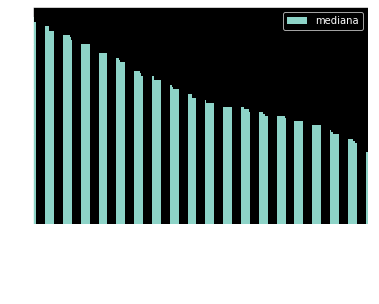

In [10]:
%matplotlib inline
df_melhores.join(df_escolas).plot.bar(y='mediana');

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_escolas.loc[(df_escolas.NO_ENTIDADE.str.contains('SAO VICENTE DE PAUL')) & (df_escolas.CO_UF == 33) & (df_escolas.CO_MUNICIPIO == 3304557)]

In [11]:
df_escolas[df_escolas.NO_ENTIDADE.str.contains('ELEVA')]
#por que a Eleva não aparece? Checar turmas no censo

,NU_ANO_CENSO,NO_ENTIDADE,CO_ORGAO_REGIONAL,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,...,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
CO_ENTIDADE,,,,,,,,,,,,,,,,,,,,,
33178860,2018,ESCOLA ELEVA,11006,1,06/02/2018,21/12/2018,3,3306,33018,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35133723,2018,ELEVACAO COLEGIO TECNICO,10602,1,29/01/2018,31/12/2018,3,3515,35061,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35133553,2018,ELEVACAO COLEGIO,NaN,4,NaN,NaN,3,3515,35061,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
CO_ELEVA = 33178860

In [13]:
CO_SAO_VICENTE = 3063648
df_sv = df_enem_rio.loc[df_enem_rio.CO_ESCOLA == CO_SAO_VICENTE]
notas = list(filter(lambda x: 'NOTA' in x, df_sv.columns.to_list() ))
df_sv[notas].mean()

NU_NOTA_CN        NaN
NU_NOTA_CH        NaN
NU_NOTA_LC        NaN
NU_NOTA_MT        NaN
NU_NOTA_COMP1     NaN
NU_NOTA_COMP2     NaN
NU_NOTA_COMP3     NaN
NU_NOTA_COMP4     NaN
NU_NOTA_COMP5     NaN
NU_NOTA_REDACAO   NaN
dtype: float64

In [14]:
df_eleva = df_enem_rio.loc[df_enem_rio.CO_ESCOLA == 33178860]
notas = list(filter(lambda x: 'NOTA' in x, df_eleva.columns.to_list() ))
df_eleva[notas].mean()

NU_NOTA_CN        NaN
NU_NOTA_CH        NaN
NU_NOTA_LC        NaN
NU_NOTA_MT        NaN
NU_NOTA_COMP1     NaN
NU_NOTA_COMP2     NaN
NU_NOTA_COMP3     NaN
NU_NOTA_COMP4     NaN
NU_NOTA_COMP5     NaN
NU_NOTA_REDACAO   NaN
dtype: float64

In [15]:
df_melhores.shape


(316, 2)

In [16]:
df_turmas = pd.concat(df_t[df_t.CO_MUNICIPIO == CO_MUN] for df_t in 
                pd.read_csv('dados\microdados_educacao_basica_2018\microdados_ed_basica_2018\DADOS\TURMAS.zip', 
                            sep='|', encoding='latin1', chunksize=1000))
df_turmas.head()

,NU_ANO_CENSO,ID_TURMA,NO_TURMA,TX_HR_INICIAL,TX_MI_INICIAL,NU_DURACAO_TURMA,QT_MATRICULAS,TP_MEDIACAO_DIDATICO_PEDAGO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,...,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
1062132,2018,6523927,10122,13.0,0.0,270.0,14,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1,0,0
1062134,2018,1182228,MATERNAL II MANHA,8.0,0.0,240.0,9,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1,0,0
1062135,2018,12106040,PRE ESCOLA 1,7.0,0.0,720.0,17,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1,0,0
1062140,2018,13346910,BERCARIO II MANHA,8.0,0.0,240.0,5,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1,0,0
1062141,2018,9484836,MATERNAL 1 T,13.0,0.0,240.0,6,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1,0,0


In [17]:
df_turmas.columns.tolist()

['NU_ANO_CENSO',
 'ID_TURMA',
 'NO_TURMA',
 'TX_HR_INICIAL',
 'TX_MI_INICIAL',
 'NU_DURACAO_TURMA',
 'QT_MATRICULAS',
 'TP_MEDIACAO_DIDATICO_PEDAGO',
 'IN_ESPECIAL_EXCLUSIVA',
 'IN_REGULAR',
 'IN_EJA',
 'IN_PROFISSIONALIZANTE',
 'TP_ETAPA_ENSINO',
 'CO_CURSO_EDUC_PROFISSIONAL',
 'TP_TIPO_TURMA',
 'IN_MAIS_EDUCACAO',
 'NU_DIAS_ATIVIDADE',
 'IN_DIA_SEMANA_DOMINGO',
 'IN_DIA_SEMANA_SEGUNDA',
 'IN_DIA_SEMANA_TERCA',
 'IN_DIA_SEMANA_QUARTA',
 'IN_DIA_SEMANA_QUINTA',
 'IN_DIA_SEMANA_SEXTA',
 'IN_DIA_SEMANA_SABADO',
 'CO_TIPO_ATIVIDADE_1',
 'CO_TIPO_ATIVIDADE_2',
 'CO_TIPO_ATIVIDADE_3',
 'CO_TIPO_ATIVIDADE_4',
 'CO_TIPO_ATIVIDADE_5',
 'CO_TIPO_ATIVIDADE_6',
 'IN_BRAILLE',
 'IN_RECURSOS_BAIXA_VISAO',
 'IN_PROCESSOS_MENTAIS',
 'IN_ORIENTACAO_MOBILIDADE',
 'IN_SINAIS',
 'IN_COMUNICACAO_ALT_AUMENT',
 'IN_ENRIQ_CURRICULAR',
 'IN_SOROBAN',
 'IN_INFORMATICA_ACESSIVEL',
 'IN_PORT_ESCRITA',
 'IN_AUTONOMIA_ESCOLAR',
 'IN_DISC_QUIMICA',
 'IN_DISC_FISICA',
 'IN_DISC_MATEMATICA',
 'IN_DISC_BIOLOGIA',
 'IN

In [18]:
df_turmas[df_turmas.CO_ENTIDADE == CO_ELEVA].sort_values(by='NO_TURMA')

,NU_ANO_CENSO,ID_TURMA,NO_TURMA,TX_HR_INICIAL,TX_MI_INICIAL,NU_DURACAO_TURMA,QT_MATRICULAS,TP_MEDIACAO_DIDATICO_PEDAGO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,...,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA
1269723,2018,11943439,10A,8.0,0.0,480.0,32,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1269724,2018,11943471,10B,8.0,0.0,480.0,33,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1293837,2018,11941864,11A,8.0,0.0,480.0,32,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1269725,2018,11943539,11B,8.0,0.0,480.0,31,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1293820,2018,11938908,1A,8.0,0.0,480.0,23,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1293821,2018,11938922,1B,8.0,0.0,480.0,22,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1293823,2018,11940345,1C,8.0,0.0,480.0,24,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1293824,2018,11940399,1D,8.0,0.0,480.0,23,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1293822,2018,11938995,1E,8.0,0.0,480.0,21,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0
1293825,2018,11940510,2A,8.0,0.0,480.0,25,1,0.0,1.0,...,0.0,NaN,1.0,0.0,0.0,0.0,0.0,2,0,0


In [19]:

df_melhores.reset_index().to_feather('dados/melhores.feather')
df_turmas.reset_index().to_feather('dados/turmas2018.feather')
df_enem_rio.reset_index().to_feather('dados/enem_rio_2018.feather')
df_escolas.reset_index().to_feather('dados/escolas_rio_2018.feather')
